# Week 6

In [450]:
# Imports & Seed
seed = 0 # for train-test split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

## Python exercises for classification

In [451]:
# 1
vehicle = pd.read_csv("vehicle.csv",sep=";")

print(f"{vehicle.info()}")
print(f"\n{vehicle.describe()}")
print(f"\n{vehicle.head()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   compactness                846 non-null    int64 
 1   circularity                846 non-null    int64 
 2   distance_circularity       846 non-null    int64 
 3   radius_ratio               846 non-null    int64 
 4   pr_axis                    846 non-null    int64 
 5   max_length_aspect_ratio    846 non-null    int64 
 6   scatter_ratio              846 non-null    int64 
 7   elongatedness              846 non-null    int64 
 8   pr_axis_rectangularity     846 non-null    int64 
 9   max_length_rect            846 non-null    int64 
 10  scaled_var_major_axis      846 non-null    int64 
 11  scaled_var_minor_axis      846 non-null    int64 
 12  scaled_radius_of_gyration  846 non-null    int64 
 13  skewness_major_axis        846 non-null    int64 
 14  skewness_m

In [452]:
# i)
print(vehicle.isnull().sum()) # no missing values

compactness                  0
circularity                  0
distance_circularity         0
radius_ratio                 0
pr_axis                      0
max_length_aspect_ratio      0
scatter_ratio                0
elongatedness                0
pr_axis_rectangularity       0
max_length_rect              0
scaled_var_major_axis        0
scaled_var_minor_axis        0
scaled_radius_of_gyration    0
skewness_major_axis          0
skewness_minor_axis          0
kurtosis_minor_axis          0
kurtosis_major_axis          0
hollows_ratio                0
Vehicle                      0
dtype: int64


In [453]:
# ii)
classes = set(vehicle["Vehicle"].to_list())

print(f"There are {len(classes)} unique classes: {classes}")
print(vehicle["Vehicle"].value_counts(normalize=True))

There are 4 unique classes: {'van', 'opel', 'saab', 'bus'}
Vehicle
bus     0.257683
saab    0.256501
opel    0.250591
van     0.235225
Name: proportion, dtype: float64


The proportion of the classes is quite consistent, with just slightly less vans.

0.6294117647058823

[[40  0  0  0]
 [ 1 16 21  5]
 [ 8 22 18  4]
 [ 2  0  0 33]]

              precision    recall  f1-score   support

         bus       0.78      1.00      0.88        40
        opel       0.42      0.37      0.40        43
        saab       0.46      0.35      0.40        52
         van       0.79      0.94      0.86        35

    accuracy                           0.63       170
   macro avg       0.61      0.67      0.63       170
weighted avg       0.59      0.63      0.60       170



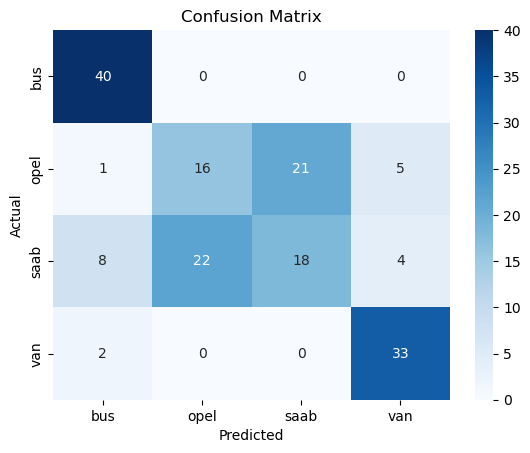

In [454]:
# iii)
# i. 80% training 20% testing
X = vehicle.drop(columns="Vehicle")
y = vehicle["Vehicle"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=seed)

# ii. min-max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) # scale train data
X_test_scaled = scaler.transform(X_test) # transformed using the same parameters

# iii. model with k = 10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled,y_train)

# iv. predictions
y_pred = knn.predict(X_test_scaled)

# -----------------------------------

# iv)
acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print(f"{acc}")
print(f"\n{cm}")
print(f"\n{cr}")

fig1, ax1 = plt.subplots()
sns.heatmap(cm,annot=True,cmap="Blues",
            xticklabels=knn.classes_,yticklabels=knn.classes_)

ax1.set_xlabel("Predicted")
ax1.set_ylabel("Actual")
ax1.set_title("Confusion Matrix")

plt.show()

In general, the model is not among the best ones but still better than a coin toss. Busses and vans are predicted correctly, but classification of saabs and opels fare much worse, which distorts the overall predictive accuracy of the whole model. This is seen basically from each distinct metric calculated/visualized.

In other words, the model would be more suitable if saabs and opels were dropped out and it was used for binary classification.

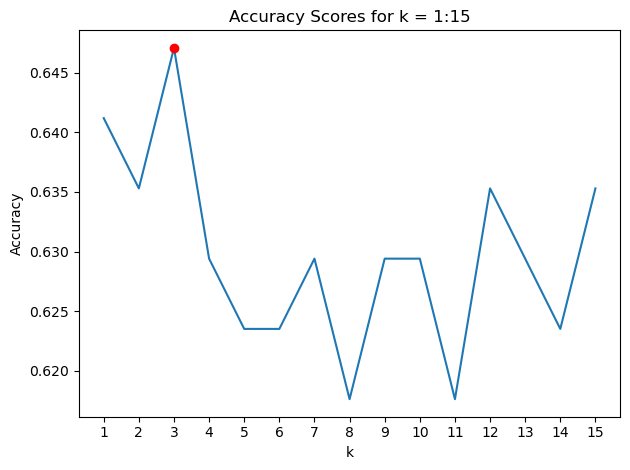

Min: 0.6176
Max: 0.6471


In [455]:
# vi)
models = []

for k in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test,y_pred)

    models.append(round(acc,4))

# vii)
fig2, ax2 = plt.subplots()
ax2.plot(np.arange(1,len(models)+1,1),models)
ax2.plot(models.index(max(models))+1,max(models),"ro")

ax2.set_xticks(np.arange(1,len(models)+1,1))
ax2.set_xlabel("k")
ax2.set_ylabel("Accuracy")

plt.title("Accuracy Scores for k = 1:15")
plt.tight_layout()
plt.show()

print(f"Min: {min(models)}\nMax: {max(models)}")

The accuracy scores range between 61.76% and 64.71%. The maximum score is achieved with `k = 3`. Lower values of k tend to result in better models.

0.6470588235294118

[[40  0  0  0]
 [ 1 15 23  4]
 [ 8 20 23  1]
 [ 1  2  0 32]]

              precision    recall  f1-score   support

         bus       0.80      1.00      0.89        40
        opel       0.41      0.35      0.38        43
        saab       0.50      0.44      0.47        52
         van       0.86      0.91      0.89        35

    accuracy                           0.65       170
   macro avg       0.64      0.68      0.66       170
weighted avg       0.62      0.65      0.63       170



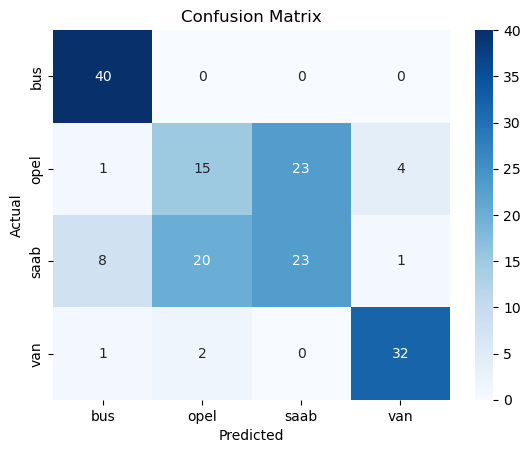

In [456]:
# viii)
knn_final = KNeighborsClassifier(n_neighbors=3)
knn_final.fit(X_train_scaled,y_train)
y_pred_final = knn_final.predict(X_test_scaled)

acc_final = accuracy_score(y_test,y_pred_final)
cm_final = confusion_matrix(y_test,y_pred_final)
cr_final = classification_report(y_test,y_pred_final)

print(f"{acc_final}")
print(f"\n{cm_final}")
print(f"\n{cr_final}")

fig3, ax3 = plt.subplots()
sns.heatmap(cm_final,annot=True,cmap="Blues",
            xticklabels=knn_final.classes_,yticklabels=knn_final.classes_)

ax3.set_xlabel("Predicted")
ax3.set_ylabel("Actual")
ax3.set_title("Confusion Matrix")

plt.show()

Not much of a difference when compared to the model with `k = 10`, just a minor improvement. The model still distinguished busses and vans, and fails with opels and saabs.

0.7058823529411765

[[36  2  1  1]
 [ 2 23 15  3]
 [ 7 16 26  3]
 [ 0  0  0 35]]

              precision    recall  f1-score   support

         bus       0.80      0.90      0.85        40
        opel       0.56      0.53      0.55        43
        saab       0.62      0.50      0.55        52
         van       0.83      1.00      0.91        35

    accuracy                           0.71       170
   macro avg       0.70      0.73      0.71       170
weighted avg       0.69      0.71      0.69       170



c:\Users\Niklas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


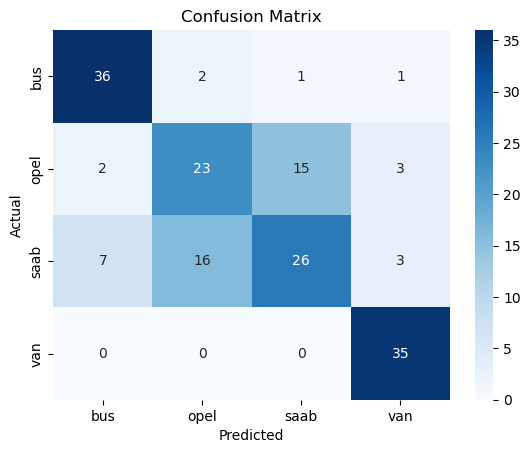

In [457]:
# 2
log_reg = LogisticRegression(multi_class="multinomial",max_iter=1000)
log_reg.fit(X_train_scaled,y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# i)
acc_log = accuracy_score(y_test,y_pred_log)
cm_log = confusion_matrix(y_test,y_pred_log)
cr_log = classification_report(y_test,y_pred_log)

print(f"{acc_log}")
print(f"\n{cm_log}")
print(f"\n{cr_log}")

fig4, ax4 = plt.subplots()
sns.heatmap(cm_log,annot=True,cmap="Blues",
            xticklabels=log_reg.classes_,yticklabels=log_reg.classes_)

ax4.set_xlabel("Predicted")
ax4.set_ylabel("Actual")
ax4.set_title("Confusion Matrix")

plt.show()

ii)

Overall, the logistic regression model performs better in terms of accuracy (70.59% vs 64.71%). However, the same trend of busses and vans getting predicted correctly and opels and saabs being predicted more randomly is still present.